In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns

In [2]:
phonesdf = pd.read_csv("mi_data.csv")
phonesdf

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery
0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery Capacity6000 mAh
1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery Capacity6000 mAh
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery Capacity5000 mAh
3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery Capacity5000 mAh
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery Capacity4250 mAhBattery TypeLi-Po
...,...,...,...,...,...,...,...,...
543,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,"₹26,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Lollipop 5.1Processor ...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",Battery Capacity4050 mAhBattery TypeLi-Polymer
544,"Redmi Note 3 (Gold, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Pie 9Processor CoreOct...,Network Type4G VOLTESupported Networks4G LTEBl...,Battery Capacity4000 mAhBattery Typelithium-ion
545,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,"₹11,990",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GB,Operating SystemAndroid Nougat 11Processor Cor...,"Network Type4G VOLTE, 5GSupported Networks4G V...",Battery Capacity4520 mAh
546,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,"₹24,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",Battery Capacity4000 mAh


# Data Cleaning and Preparation

In [3]:
phonesdf['model_names']=phonesdf['model_names'].apply(lambda x:str(x.split('(')[0]))

In [4]:
#Create some new columns for the Internal storage, RAM, Processor type and android version
phonesdf['Internal_Storage']= phonesdf['storage_ram'].apply(lambda x:str(x.split('RAM')[0]))
phonesdf['RAM']=phonesdf['storage_ram'].apply(lambda x:str(x.split('RAM')[1]))
phonesdf['OS']=phonesdf['os_processor'].apply(lambda x:str(x.split('Processor')[0]))
phonesdf['battery'] = phonesdf['battery'].apply(lambda x:str(x.replace('Battery Capacity','')))

In [5]:
def network_type(x):
    if '5G' in x:
        return '5G'
    if '4G' in x:
        return '4G'
    else:
        return '3G'

In [6]:
phonesdf['network'] = phonesdf['network'].apply(network_type)

In [7]:
phonesdf.drop(['imgURL','storage_ram','os_processor'], axis=1, inplace=True)

In [8]:
phonesdf['Internal_Storage']=phonesdf['Internal_Storage'].str.replace('Internal Storage','') 
phonesdf['RAM']=phonesdf['RAM'].apply(lambda x:str(x.split('GB')[0]))
phonesdf['OS']=phonesdf['OS'].str.replace('Operating SystemAndroid','')
phonesdf['battery']=phonesdf['battery'].apply(lambda x:str(x.split('mAh')[0]))

In [9]:
def space(x):
    if 'GB' in x:
        return x[:-2]
    if 'MB' in x:
        x = x[:-2]
        return int(x)*0.001
    else:
        return x

In [10]:
phonesdf['Internal_Storage'] =phonesdf['Internal_Storage'].apply(space)


In [11]:
def Ram(x):
    if 'MB' in x:
        y= x.split('MB')[0]
        return int(y)*0.001
    else:
        return x

In [12]:
phonesdf['RAM'] = phonesdf['RAM'].apply(Ram)

In [13]:
phonesdf

,model_names,ratings,price,network,battery,Internal_Storage,RAM,OS
0,REDMI 10 Power,4.2,"₹13,500",4G,6000,128,8,13
1,REDMI 10 Power,4.2,"₹12,840",4G,6000,128,8,13
2,Redmi 9A Sport,4.1,"₹7,520",4G,5000,32,2,Q 10
3,Redmi 9A Sport,4.2,"₹8,450",4G,5000,32,3,Q 10
4,Xiaomi 11Lite NE,4.2,"₹21,644",5G,4250,128,6,11
...,...,...,...,...,...,...,...,...
543,Xiaomi 11i 5G,4.5,"₹26,999",4G,4050,32,3,Lollipop 5.1
544,Redmi Note 3,4.1,"₹8,999",4G,4000,32,3,Pie 9
545,Redmi Note 8,4.3,"₹11,990",5G,4520,128,6,Nougat 11
546,MI 11X 5G,4.3,"₹24,999",4G,4000,64,4,Nougat 7.1.2


In [14]:
phonesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_names       548 non-null    object 
 1   ratings           548 non-null    float64
 2   price             548 non-null    object 
 3   network           548 non-null    object 
 4   battery           548 non-null    object 
 5   Internal_Storage  548 non-null    object 
 6   RAM               548 non-null    object 
 7   OS                548 non-null    object 
dtypes: float64(1), object(7)
memory usage: 34.4+ KB


In [15]:
phonesdf['OS'].value_counts()

 11                                                95
 12                                                55
 Q 11                                              50
 Pie 9.0                                           48
 Oreo 8.1                                          38
 Pie 9                                             33
 10                                                29
 Nougat 7.1.2                                      25
 Q 10                                              22
 Marshmallow 6.0.1                                 19
 Android 13                                        14
 12.0Primary Clock Speed2 GHz                      11
                                                    9
 13                                                 9
 Android 11                                         8
 Pie 10                                             7
 MIUI 13, Android 12.0                              7
 Oreo 8.0                                           6
 12 Go                      

In [16]:
phonesdf['OS'] = phonesdf['OS'].str.extract('(\d+)', expand=False)

In [17]:
phonesdf.dropna(inplace= True)

In [18]:
phonesdf

,model_names,ratings,price,network,battery,Internal_Storage,RAM,OS
0,REDMI 10 Power,4.2,"₹13,500",4G,6000,128,8,13
1,REDMI 10 Power,4.2,"₹12,840",4G,6000,128,8,13
2,Redmi 9A Sport,4.1,"₹7,520",4G,5000,32,2,10
3,Redmi 9A Sport,4.2,"₹8,450",4G,5000,32,3,10
4,Xiaomi 11Lite NE,4.2,"₹21,644",5G,4250,128,6,11
...,...,...,...,...,...,...,...,...
543,Xiaomi 11i 5G,4.5,"₹26,999",4G,4050,32,3,5
544,Redmi Note 3,4.1,"₹8,999",4G,4000,32,3,9
545,Redmi Note 8,4.3,"₹11,990",5G,4520,128,6,11
546,MI 11X 5G,4.3,"₹24,999",4G,4000,64,4,7


In [19]:
phonesdf['price']=phonesdf['price'].str.replace(',','')
phonesdf['price']=phonesdf['price'].str.extract('(\d+)',expand= False)

In [20]:
phonesdf['price']=phonesdf['price'].astype('int')
phonesdf['battery']=phonesdf['battery'].astype('float')
phonesdf['Internal_Storage']=phonesdf['Internal_Storage'].astype('float')
phonesdf['RAM']=phonesdf['RAM'].astype('float')
phonesdf['OS']=phonesdf['OS'].astype('int')

In [21]:
phonesdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 547
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_names       539 non-null    object 
 1   ratings           539 non-null    float64
 2   price             539 non-null    int32  
 3   network           539 non-null    object 
 4   battery           539 non-null    float64
 5   Internal_Storage  539 non-null    float64
 6   RAM               539 non-null    float64
 7   OS                539 non-null    int32  
dtypes: float64(4), int32(2), object(2)
memory usage: 33.7+ KB


In [22]:
phonesdf['battery'].value_counts()

5000.0    213
4000.0     79
6000.0     36
5020.0     34
4250.0     28
3000.0     28
4520.0     16
4500.0     15
4100.0     14
3080.0     11
3010.0      9
5160.0      8
4600.0      7
4030.0      6
4980.0      5
5080.0      4
2500.0      4
3300.0      4
4850.0      3
3120.0      2
3400.0      2
4780.0      2
4820.0      2
2200.0      2
2000.0      1
5018.0      1
3030.0      1
3050.0      1
4050.0      1
Name: battery, dtype: int64

In [23]:
def specific_range(x):
        if 3000<x<=3200:
            return 3000
        if 3250>x<3500:
            return 3500
        if 4000<x<4300:
            return 4000
        if 4300<x<4600:
            return 4500
        if 4700<x<5300:
            return 5000
        if x>5700:
            return 6000
        else:
            return x

In [24]:
phonesdf['battery']=phonesdf['battery'].apply(specific_range)

In [25]:
exchange_rate=9.36

In [26]:
def convert_currency(x):
        result= exchange_rate*x
        return result

In [27]:
phonesdf['price']=phonesdf['price'].apply(convert_currency)

In [28]:
phonesdf.describe()

,ratings,price,battery,Internal_Storage,RAM,OS
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,4.223933,157546.582263,4590.352505,96.817276,6.968935,10.007421
std,0.266260,83883.197103,713.452563,62.468992,15.023335,2.112967
min,2.500000,7478.640000,3000.000000,0.128000,0.064000,1.000000
25%,4.200000,98270.640000,4000.000000,64.000000,4.000000,9.000000
50%,4.200000,140390.640000,5000.000000,64.000000,6.000000,11.000000
75%,4.400000,205779.600000,5000.000000,128.000000,6.000000,11.000000
max,4.500000,701906.400000,6000.000000,256.000000,128.000000,14.000000


<Axes: xlabel='Internal_Storage', ylabel='Count'>

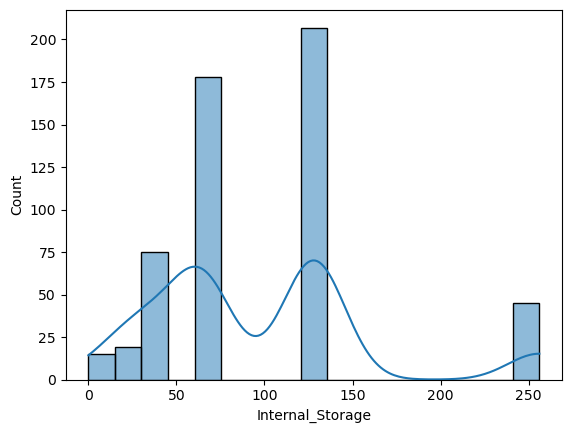

In [29]:
sns.histplot(data=phonesdf, x='Internal_Storage',kde=True)

In [30]:
max_threshold=phonesdf['Internal_Storage'].quantile(0.999)
min_threshold=phonesdf['Internal_Storage'].quantile(0.001)

In [31]:
max_threshold,min_threshold

(256.0, 0.128)

In [32]:
phonesdf[phonesdf['Internal_Storage']>min_threshold] 

,model_names,ratings,price,network,battery,Internal_Storage,RAM,OS
0,REDMI 10 Power,4.2,126360.00,4G,6000.0,128.0,8.0,13
1,REDMI 10 Power,4.2,120182.40,4G,6000.0,128.0,8.0,13
2,Redmi 9A Sport,4.1,70387.20,4G,5000.0,32.0,2.0,10
3,Redmi 9A Sport,4.2,79092.00,4G,5000.0,32.0,3.0,10
4,Xiaomi 11Lite NE,4.2,202587.84,5G,4000.0,128.0,6.0,11
...,...,...,...,...,...,...,...,...
543,Xiaomi 11i 5G,4.5,252710.64,4G,4000.0,32.0,3.0,5
544,Redmi Note 3,4.1,84230.64,4G,4000.0,32.0,3.0,9
545,Redmi Note 8,4.3,112226.40,5G,4500.0,128.0,6.0,11
546,MI 11X 5G,4.3,233990.64,4G,4000.0,64.0,4.0,7


In [33]:
phonesdf.sample(10)

,model_names,ratings,price,network,battery,Internal_Storage,RAM,OS
430,Redmi Note 9 Pro,4.3,144986.40,4G,5000.0,128.0,4.0,10
3,Redmi 9A Sport,4.2,79092.00,4G,5000.0,32.0,3.0,10
322,REDMI Note 10S,4.4,159110.64,4G,5000.0,64.0,6.0,11
410,REDMI Note 8 Pro,4.5,168470.64,4G,4500.0,128.0,6.0,9
17,Redmi 10 Prime,4.2,112320.00,4G,6000.0,64.0,4.0,11
472,REDMI Note 10 lite,4.4,126350.64,4G,5000.0,64.0,4.0,11
294,REDMI Note 10T 5G,4.2,159110.64,5G,5000.0,128.0,6.0,11
425,Redmi Note 6 Pro,4.3,121586.40,4G,4000.0,64.0,6.0,8
419,Redmi 6A,4.3,59894.64,4G,3500.0,16.0,2.0,8
0,REDMI 10 Power,4.2,126360.00,4G,6000.0,128.0,8.0,13


In [34]:
phonesdf['battery']=phonesdf['battery'].astype('str')+'mAh'

In [35]:
phonesdf = phonesdf.reset_index(drop=True)

In [36]:
phonesdf['RAM'].value_counts()

6.000      170
4.000      147
8.000       90
3.000       59
2.000       45
12.000      11
128.000      8
1.000        5
0.064        4
Name: RAM, dtype: int64

In [37]:
phonesdf['Internal_Storage'].value_counts()

128.000    207
64.000     178
32.000      75
256.000     45
16.000      19
6.000        8
0.128        4
8.000        3
Name: Internal_Storage, dtype: int64

## One hot encoding

In [38]:
OHD = pd.get_dummies(phonesdf,columns=['battery','Internal_Storage','RAM','OS','network'])

In [39]:
OHD.columns

Index(['model_names', 'ratings', 'price', 'battery_3000.0mAh',
       'battery_3300.0mAh', 'battery_3400.0mAh', 'battery_3500.0mAh',
       'battery_4000.0mAh', 'battery_4500.0mAh', 'battery_4600.0mAh',
       'battery_5000.0mAh', 'battery_6000.0mAh', 'Internal_Storage_0.128',
       'Internal_Storage_6.0', 'Internal_Storage_8.0', 'Internal_Storage_16.0',
       'Internal_Storage_32.0', 'Internal_Storage_64.0',
       'Internal_Storage_128.0', 'Internal_Storage_256.0', 'RAM_0.064',
       'RAM_1.0', 'RAM_2.0', 'RAM_3.0', 'RAM_4.0', 'RAM_6.0', 'RAM_8.0',
       'RAM_12.0', 'RAM_128.0', 'OS_1', 'OS_2', 'OS_4', 'OS_5', 'OS_6', 'OS_7',
       'OS_8', 'OS_9', 'OS_10', 'OS_11', 'OS_12', 'OS_13', 'OS_14',
       'network_3G', 'network_4G', 'network_5G'],
      dtype='object')

In [40]:
OHD.drop(['battery_6000.0mAh','model_names','ratings'],axis=1, inplace=True)

In [41]:
y=OHD.price
x=OHD.drop('price',axis=1)

In [42]:
x

,battery_3000.0mAh,battery_3300.0mAh,battery_3400.0mAh,battery_3500.0mAh,battery_4000.0mAh,battery_4500.0mAh,battery_4600.0mAh,battery_5000.0mAh,Internal_Storage_0.128,Internal_Storage_6.0,...,OS_8,OS_9,OS_10,OS_11,OS_12,OS_13,OS_14,network_3G,network_4G,network_5G
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
535,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
536,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
537,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
y

0      126360.00
1      120182.40
2       70387.20
3       79092.00
4      202587.84
         ...    
534    252710.64
535     84230.64
536    112226.40
537    233990.64
538    117000.00
Name: price, Length: 539, dtype: float64

## Train test split

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.15, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [46]:
scoring='neg_mean_squared_error'
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring=scoring, cv=5, n_jobs=-1)).mean()
    return rmse

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [47]:
models=pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
predictions=lin_reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 5586549212309792.0
MSE: 2.527972100192986e+33
RMSE: 5.027894291045692e+16
R2 Score: -2.611495671633669e+23
------------------------------
RMSE Cross-Validation: 5.806170077925604e+16


C:\Users\HP\AppData\Local\Temp\ipykernel_8480\2078764784.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [49]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
predictions=lin_reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(log_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LogisticRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

ValueError: Unknown label type: 'continuous'